# Data Analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Eluvio_DS_Challenge.csv")

In [3]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


# Approach

A lot can be derived from author of the posts as well to determine whether the audience are inclined to certain authors who tend to up vote their posts regularly. There are various features to pick. But "time_created" isn't going to make a great feature to analyze because there are different time zones across the globe and the time at which the article was posted might be in a different time zone compared to the target audience. For e.g., If there's any trending Soccer news in India and the author might have posted about it. But the time the author posted might be midnight in Europian countries and cannot see any up votes and there might be a relatively lower reach and hence lower up votes. Same goes with the date_created feature as well. 

As down_votes and category are all the same value, they are no use as well.

"over_18" feature is inconsiderable as well because most of the values are only of one value "False". So, if we add this feature to our model, the model becomes skewed.

"title" and "author" are the only features to deal with which can explain the up_votes. Let us explore the relationship between the title, author and up_votes.

# Analysis on author and up_votes relationship

As most of the authors posted only a very few articles. We pull the top authors with most number of posts and check their relation with the trend of up votes if there is any

In [4]:
# Getting the number of different authors
dc={}
dc_up_votes_count={}
dc_up_votes_mean={}
dc_no_of_posts={}
for i in range(len(df)):
    if dc.get(df["author"][i]) is None:
        dc[str(df["author"][i])]=0
print("number of different authors", len(dc))

dc_up_votes_count=dc.copy()
dc_up_votes_mean=dc.copy()
dc_no_of_posts=dc.copy()

number of different authors 85838


In [5]:
# Getting the top authors whose up_vote count per post is high and exploring them 
for i in range(len(df)):
    if dc_no_of_posts.get(str(df["author"][i])) is not None:
        dc_up_votes_count[str(df["author"][i])]=dc_up_votes_count[str(df["author"][i])]+df["up_votes"][i]
        dc_no_of_posts[str(df["author"][i])]=dc_no_of_posts[str(df["author"][i])]+1
        
for i in (dc):
    dc_up_votes_mean[i]=dc_up_votes_count[i]/dc_no_of_posts[i]

In [6]:
# sorting to the get the top 10 authors with most number of posts 
dict(sorted(dc_no_of_posts.items(), key=lambda item: item[1]))
els = list(dc_no_of_posts.items())
els.sort(key = lambda x: x[1]) 
els=els[-10:]
els

[('madazzahatter', 2503),
 ('nimobo', 2564),
 ('madam1', 2658),
 ('twolf1', 2923),
 ('readerseven', 3170),
 ('igeldard', 4013),
 ('maxwellhill', 4023),
 ('DoremusJessup', 5037),
 ('anutensil', 5730),
 ('davidreiss666', 8897)]

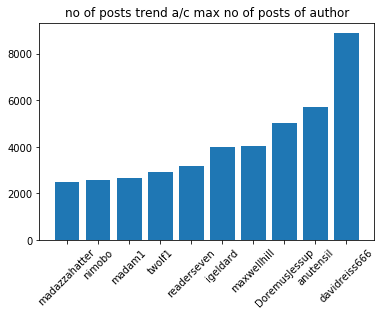

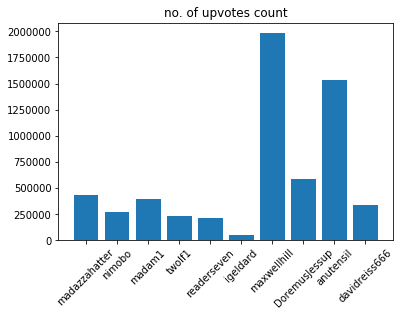

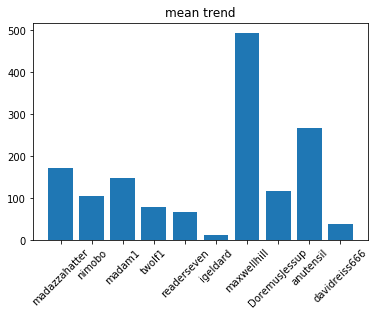

In [7]:
#plotting

x=[]
y_upvotes=[]
y_upvotes_per_post=[]
y_no_of_posts=[]
for i in range(len(els)):
    x.append(els[i][0])
    y_upvotes.append(dc_up_votes_count[str(els[i][0])])
    y_upvotes_per_post.append(dc_up_votes_mean[str(els[i][0])])
    y_no_of_posts.append(dc_no_of_posts[str(els[i][0])])
    
plt.bar(x,y_no_of_posts)
plt.title("no of posts trend a/c max no of posts of author")
plt.xticks(rotation=45)
plt.show()

plt.bar(x,y_upvotes)
plt.title("no. of upvotes count")
plt.xticks(rotation=45)
plt.show()

plt.bar(x,y_upvotes_per_post)
plt.title("mean trend")
plt.xticks(rotation=45)
plt.show()

The above plots shows us that the audience are not inclined towards the authors. If they are inclined to the authors then the author who posted higher number of posts would have had higher number of upvotes and higher mean as well. Remember that we are discussing only the top performing authors and hence any recommendation algorithm (which shows the author's news on top of the audience timeline) of any app would work the same for all the top 10 authors we've picked. Hence, making our discussion unbiased and works well irrespective of the environment the data is pulled from. 

From this we can partially conclude that audience prefer to up vote the article irrespective of the author posted. Then we are left to answer only one question which is "Why are these author's titles getting more up votes compared to others?". It can be of only one reason that these authors are posting the most trending news and the topics which are liked by the audience. This can be evaluated by pulling the top words from all the titles and compare them with the top words from all the titles of the top 10 authors. 

# Exploring top words

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
#creating a dataframe of top authors
dset=set()
for i in range(len(els)):
    dset.add(els[i][0])
dset
dfauthor= df[df["author"].isin(dset)]
dfauthor

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
289,1203448166,2008-02-19,6,0,"Philip s a Nazi, Camilla s a crocodile and Dia...",False,igeldard,worldnews
290,1203448264,2008-02-19,2,0,How you pay the heating and phone bills for na...,False,igeldard,worldnews
291,1203448465,2008-02-19,2,0,£75bn black hole due to increased life expecta...,False,igeldard,worldnews
303,1203445500,2008-02-19,5,0,Behind the Baghdad Bird Market Bombings: Using...,False,igeldard,worldnews
304,1203445800,2008-02-19,2,0,Exhibition Seeks Rightful Owners for Nazi Loot,False,igeldard,worldnews
...,...,...,...,...,...,...,...,...
509065,1479761104,2016-11-21,2,0,Canada’s spies have a new risk — Pokemon,False,nimobo,worldnews
509094,1479777217,2016-11-22,3360,0,"It s time to decriminalize drugs, commission r...",False,maxwellhill,worldnews
509203,1479812809,2016-11-22,3,0,U.S. forces backing Iraqi troops retaking Mosu...,False,madam1,worldnews
509209,1479813159,2016-11-22,3,0,The Arctic is experiencing extraordinarily hot...,False,madam1,worldnews


In [10]:
# Method for removing stop words and getting the top words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def print_common(strr,words):
    print(strr)
    for word, freq in words:
        print(word, freq)

In [11]:
common_words = get_top_n_words(df['title'], 20)
print_common("common words from all authors and titles\n",common_words)

common words from all authors and titles

china 26397
says 25432
new 23388
syria 19023
russia 18766
world 18091
police 16654
government 16305
israel 16048
iran 15816
president 15271
killed 14328
people 13991
state 13489
attack 12925
war 12820
russian 12378
military 11828
uk 11784
north 11589


In [12]:
common_words_top_authors = get_top_n_words(dfauthor['title'], 20)
print_common("common words from top authors", common_words_top_authors)

common words from top authors
new 3063
said 2786
government 2735
says 2719
china 2564
president 2489
police 2205
people 2205
country 2125
world 2052
minister 1902
killed 1711
state 1697
year 1505
military 1410
court 1409
japan 1400
syria 1397
russia 1380
000 1346


In [13]:
d_common_words=set()
for word, freq in common_words:
    if word not in d_common_words:
        d_common_words.add(word)
wordds=[]
i=0
print("Intersection of common words of all titles and common words of titles of top authors\n")
for word, freq in common_words_top_authors:
    if word in d_common_words:
        i=i+1
        wordds.append(word)
        print(word)
print("\n"+str(i)+" words in common out of top 20 words")

Intersection of common words of all titles and common words of titles of top authors

new
government
says
china
president
police
people
world
killed
state
military
syria
russia

13 words in common out of top 20 words


As we can see that from all the 85,000 authors who've posted around 500,000 articles, the top 10 authors constitute to only 45,000 posts which is less than 10 percent of the total articles. Yet, they constitute the 13 common words from the top 20 common words of all the articles. Hence we may conclude that these authors cover the most important topics or the topics in which their audience or more interested in.

We may as well conclude that the audience are not inclined towards the authors (people tend to up vote whatever their favorite person posts but not in this case) but are inclined towards the topics of the titles. They are skimming the title and are only up voting the relevant content. This can be derived from the fact that the top words of the top authors are also the top words of all the articles posted and these authors are on top not because of the audience are inclined to them but because they post the most relevant content. 



We are only left with one feature which is "title" to train our model to predict how does a given title is going to perform (regarding the number of up votes). Please review the "ML Model.ipynb" and "Deep_learning.ipynb" files to check out my training and models.